# MLP Regressor using Bluetooth data

<p>Jupyter Notebook which aims to explore the ML algorithm Multi-Layer Perceptron as a Regressor algorithm using BLE technology moreover using the strength of the signal as a basis. </p>

## Imports
Imports of the libraries to be used throughout the experiments

In [1]:
#CSV Related
import pandas as pd
import csv

# Machine Learning
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
import scipy
import sklearn

#Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#Graphical Display
%matplotlib inline
from IPython.display import display, HTML
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

#Additional Helper Libraries
from operator import itemgetter
import re

## Load File and Structure Data Function
Function to load csv and structure data accordingly

In [2]:
#Function that reads a csv file and structures the data accordingly
def load_file(filename):
    dataset = pd.read_csv(filename)
    return dataset

## Initialize Training Data

In [3]:
def find_beacon_index():
    first_beacon_index = -1
    for ap in dataset.iloc[:,4:]:
        if ap.islower() == False:
            first_beacon_index = list(dataset).index(ap)
            break
    return first_beacon_index

In [4]:
dataset = load_file('../radiomapBluetoothWiFi.csv')
beacon_index = find_beacon_index()
X_train = dataset.iloc[:,beacon_index:]
Y_train = dataset.iloc[:,1:3]
nan_filler = X_train.min().min()*1.010
X_train = X_train.replace(0, np.nan)
X_train = X_train.fillna(nan_filler)
display(X_train.shape)
display(Y_train.shape)
display(dataset.describe().transpose())
n_features = X_train.shape[1]
display(n_features)

(130, 3)

(130, 2)

,count,mean,std,min,25%,50%,75%,max
Fingerprint ID,130.0,588.500000,37.671829,524.0,556.25,588.5,620.75,653.0
coordinate_X,130.0,-0.769231,0.752654,-2.0,-1.50,-0.5,0.00,0.0
coordinate_Y,130.0,-0.500000,0.902194,-1.5,-1.50,-0.5,0.50,0.5
c4:e9:84:42:ac:ff,130.0,-65.053846,15.034488,-81.0,-70.00,-67.0,-65.00,0.0
00:06:91:d4:77:00,130.0,-59.430769,14.109175,-74.0,-66.00,-61.0,-58.25,0.0
00:06:91:d4:77:02,130.0,-59.184615,15.009446,-75.0,-66.00,-61.0,-59.00,0.0
8c:5b:f0:78:a1:d6,130.0,-50.661538,29.405888,-77.0,-69.75,-66.0,-53.00,0.0
1c:ab:c0:df:99:c8,130.0,-56.407692,30.493282,-78.0,-75.00,-71.0,-67.25,0.0
1c:ab:c0:df:99:c9,130.0,-51.523077,32.748091,-77.0,-73.00,-70.5,0.00,0.0
00:26:5b:d1:93:38,130.0,-19.284615,33.198775,-80.0,-55.50,0.0,0.00,0.0


3

## Radio Map Graphical Display

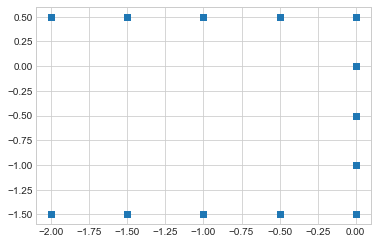

In [5]:
x , y = map(list, zip(*Y_train.values)) 
fig = plt.figure()
ax = plt.axes()
plt.plot(x,y,'s')

## Beacons Graphical Display
Graphical display with the average strength signal transmitted by each beacon

<BarContainer object of 3 artists>

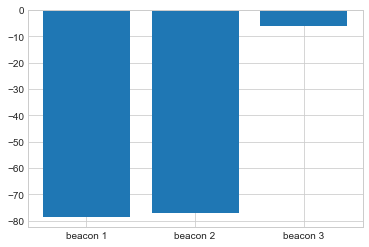

In [6]:
count_beacons = {}
counter = 1
beacons = X_train
for beacon in beacons:
    mean_value = dataset[beacon].mean()
    count_beacons['beacon ' + str(counter)] = mean_value
    counter = counter + 1
plt.bar(range(len(count_beacons)),list(count_beacons.values()),align='center',tick_label=list(count_beacons.keys()))

## Number of Fingerprints per Reference Point Graphical Display
Graphical display of the number of fingerprints retrieved at each reference point

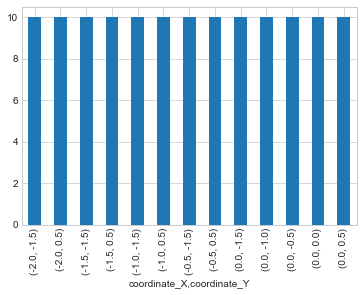

In [7]:
reference_points = dataset.groupby(['coordinate_X','coordinate_Y'])
reference_points.size().plot(kind="bar")

## Signal Strength Distribution Display
Graphical display of the distribution of the signal strength

### Bluetooth Signal Strength

Text(0, 0.5, 'Probability')

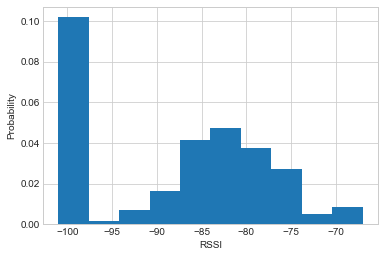

In [8]:
flatten_results = X_train.values.flatten().tolist()
plt.hist(flatten_results,density=True)
plt.xlabel('RSSI')
plt.ylabel('Probability')

## Initialize MLP Parameters arrays
Initialization of the arrays with the different possible values for the parameters of MLP Regressor function

In [9]:
#MLP Configurable Arrays
activation_function_list = ['logistic','tanh','relu'] 
solver_list = ['lbfgs','sgd','adam']
filters_list = ["Median","Mean","No Filter"]
learning_rate_list = ['constant','invscaling','adaptive']
number_iterations_list = [200,400,500,1000,2000]
scaler_list = [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),None]
momentum_list = [0,0.9]
alpha_list = [0.0001,0.001,1e-05,0.1]
default_data_scenario = Y_train.copy()
default_data_scenario_groups = default_data_scenario["coordinate_X"].map(str)+","+default_data_scenario["coordinate_Y"].map(str)

## Statistics Output Format
Structure of the statistical output of each call to the MLP Classification Function

In [10]:
def structure_data(data,rsquared):
    mae = data['error'].abs().mean()
    mse = np.power(data['error'],2).mean()
    rsme = np.sqrt(mse)
    std = data['error'].std()
    q25 = data['error'].quantile(q=0.25)
    q50= data['error'].quantile(q=0.5)
    q75 =data['error'].quantile(q=0.7)
    q95= data['error'].quantile(q=0.95)
    r_squared = rsquared
    minValue= data['error'].min()
    maxValue = data['error'].max()
    statistical_results = [mae,mse,rsme,std,q25,q50,q75,q95,minValue,maxValue,r_squared]
    return statistical_results

## Configurable MLP Regressor Function 

In [11]:
def compute_MLP_with_Regression(number_features = n_features,trainX_data = None,trainY_data = None,testX_data = None,testY_data = None,scaler = StandardScaler(),
                                    cross_validation = None,activation_function='relu',solver_function='adam',
                                    learning_rate_value='constant',momentum_value = 0.9, alpha_value = 0.0001,max_iterations = 1000):
    # Init the NN Classifier
    mlp_regression_estimator = MLPRegressor(hidden_layer_sizes=(number_features,number_features,number_features),
                                            activation=activation_function,solver=solver_function,max_iter=max_iterations,
                                            learning_rate=learning_rate_value,momentum=momentum_value,
                                             alpha=alpha_value,random_state=6
                                            )
    if scaler is not None:
        # Make pipeline using scaler transformation
        main_estimator = make_pipeline(scaler,mlp_regression_estimator)
    else:
        main_estimator = mlp_regression_estimator
    if cross_validation is None:
        # Fit the training data
        main_estimator.fit(trainX_data,trainY_data)
        # Predict the results of the testing data features
        predict_test = main_estimator.predict(testX_data)
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    else:
        predict_test = cross_val_predict(main_estimator,testX_data,testY_data,cv = cross_validation,groups=default_data_scenario_groups)
        coefficient_determination = sklearn.metrics.r2_score(testY_data,predict_test)
    # Structure data to statistics
    statistical_array = list()
    coord_cols = ['coordinate_X','coordinate_Y']
    predictions = pd.DataFrame(predict_test,columns=coord_cols)
    result = testY_data.join(predictions, rsuffix="_predicted")
    observed_errors = predictions[coord_cols] - result[coord_cols]
    error = pd.DataFrame(observed_errors.apply(np.linalg.norm, axis=1), columns=["error"])
    result = pd.concat([result,error], axis = 1)
    return structure_data(result,coefficient_determination)

## Experiments

### 1st Experiment - Running MLP function with default parameters and testing data equal to training data

In [12]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared']
result = compute_MLP_with_Regression(trainX_data=X_train,trainY_data=Y_train,
                                         testX_data=X_train,testY_data=Y_train,
                                         scaler=StandardScaler())
statistical_results = [result]
statistics = pd.DataFrame(columns=statistical_cols,data=statistical_results)
display(statistics)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared
0,0.675288,0.562614,0.750076,0.32776,0.426606,0.649644,0.88698,1.171351,0.171536,1.993282,0.564627


### 2nd Experiment - Tunning parameters with GridSearchCV

In [13]:
def tune_parameters():
    results = []
    tuned_parameters = {
        'mlp__activation':activation_function_list,
        'mlp__solver':solver_list,
        'mlp__alpha': alpha_list,
        'mlp__max_iter':number_iterations_list
    }
    sgd_parameters = {
        'mlp__learning_rate':learning_rate_list,
        'mlp__momentum':momentum_list,
        'mlp__alpha': alpha_list,
        'mlp__max_iter':number_iterations_list
    }
    skf = StratifiedKFold()
    splited = skf.split(X_train,default_data_scenario_groups,groups=default_data_scenario_groups)
    pipe = Pipeline([('standardizer', StandardScaler()), ('mlp', MLPRegressor())])
    clf = GridSearchCV(
       pipe, tuned_parameters, cv=splited,scoring=sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error,
                                                        greater_is_better=False,
                                                        multioutput="uniform_average"),n_jobs=-1
    )
    clf.fit(X_train,Y_train)
    clf.best_params_['type'] = 'general'
    results.append(clf.best_params_)
    gridcv_results = pd.DataFrame(results)
    display(gridcv_results)
    results=[]
    pipe = Pipeline([('standardizer', StandardScaler()), ('mlp', MLPRegressor())])
    clf = GridSearchCV(
       pipe, sgd_parameters, scoring=sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error,
                                                        greater_is_better=False,
                                                        multioutput="uniform_average"),n_jobs=-1
    )
    clf.fit(X_train,Y_train)
    clf.best_params_['type'] = 'sgd_parameters'
    results.append(clf.best_params_)
    gridcv_results = pd.DataFrame(results)
    display(gridcv_results)

In [14]:
tune_parameters()

,mlp__activation,mlp__alpha,mlp__max_iter,mlp__solver,type
0,relu,0.1,500,lbfgs,general


,mlp__alpha,mlp__learning_rate,mlp__max_iter,mlp__momentum,type
0,0.001,invscaling,200,0.9,sgd_parameters


### 3th Experiment - Running the MLP function with default parameters and Hold-out Cross Validation

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,test_size
1,0.663811,0.512482,0.715878,0.273332,0.465264,0.641313,0.789832,1.087463,0.200975,1.279420,0.595720,0.2
0,0.667408,0.522565,0.722886,0.289067,0.457728,0.625405,0.773117,1.084590,0.199688,1.299519,0.587036,0.1
2,0.684717,0.543422,0.737172,0.276672,0.441933,0.691421,0.893363,1.089974,0.194677,1.239967,0.577926,0.3
4,0.694949,0.572305,0.756508,0.301243,0.443122,0.701381,0.843238,1.218608,0.189611,1.324778,0.556031,0.5
3,0.700196,0.572624,0.756720,0.289768,0.460919,0.682064,0.870378,1.194856,0.213893,1.342206,0.554121,0.4
6,0.717541,0.626938,0.791794,0.336628,0.434124,0.715299,0.913889,1.273541,0.187951,1.590050,0.515008,0.7
5,0.717623,0.613186,0.783062,0.315402,0.469529,0.720677,0.922054,1.216049,0.184950,1.577832,0.522541,0.6
7,0.766048,0.722318,0.849893,0.369870,0.429162,0.755201,0.959929,1.469298,0.188079,1.693310,0.449028,0.8
8,0.850714,0.897043,0.947123,0.418118,0.480502,0.812464,1.002911,1.695551,0.167845,2.290950,0.332187,0.9


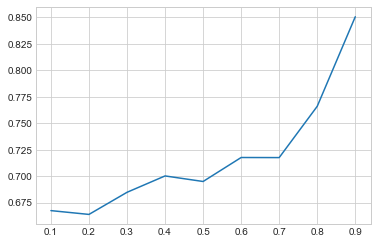

In [15]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared']
test_sizes =[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
results = list()
for size in test_sizes:
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train,Y_train, test_size = size, random_state = 6,stratify=default_data_scenario_groups)
    X_train_split = X_train_split.reset_index(drop=True)
    X_test_split = X_test_split.reset_index(drop=True)
    y_train_split = y_train_split.reset_index(drop=True)
    y_test_split = y_test_split.reset_index(drop=True)
    result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                             testX_data=X_test_split,testY_data=y_test_split,
                                             scaler=StandardScaler())
    result.append(size)
    results.append(result)
statistical_cols.append('test_size')
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae'],))
plt.plot(statistics['test_size'],statistics['mae'])

### 4th Experiment -  Running the MLP function with default parameters and Stratified K-Fold cross validation

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,folds
7,0.939392,1.087803,1.042978,0.454903,0.570788,0.866303,1.170727,2.033071,0.150690,2.188592,0.173737,9
8,0.955125,1.103491,1.050472,0.438988,0.693773,0.886746,1.141178,2.050612,0.160136,2.211021,0.175473,10
6,0.995749,1.200093,1.095487,0.458468,0.722976,0.918450,1.208508,2.045436,0.064264,2.322862,0.106042,8
4,1.033211,1.303927,1.141896,0.488093,0.638424,0.963227,1.295037,2.045127,0.206388,2.269481,0.007867,6
5,1.063866,1.337717,1.156597,0.455525,0.764234,1.072782,1.244620,2.035213,0.104261,2.270391,0.007142,7
3,1.201692,1.660425,1.288575,0.466947,0.882999,1.159700,1.501987,2.120129,0.127200,2.312564,-0.258484,5
2,1.509061,2.540890,1.594017,0.515431,1.151230,1.420106,1.739621,2.482774,0.333253,2.836221,-0.934678,4
1,1.599219,2.880967,1.697341,0.570940,1.107793,1.571729,1.881619,2.492430,0.495131,2.905080,-1.083090,3
0,1.902882,3.833853,1.958023,0.463186,1.733500,1.981409,2.104470,2.484173,0.639118,3.040898,-1.548713,2


Number of Folds:  9


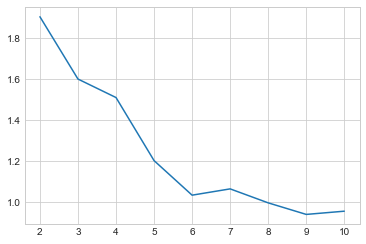

In [16]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared']
cross_validation_list = np.arange(2,11)
results = list()
for cv in cross_validation_list:
    result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                             scaler=StandardScaler(),
                                             cross_validation = cv)  
    result.append(cv)
    results.append(result)
statistical_cols.append('folds')
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['folds'],statistics['mae'])
selected_fold = statistics.sort_values(by=['mae'])['folds'].head(1).values[0]
print("Number of Folds: ",selected_fold)

### 5th Experiment -  Running the MLP function with default parameters and Leave One Group Out cross validation

In [17]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared']
results = list()
cv = LeaveOneGroupOut()
splited = cv.split(X_train,default_data_scenario_groups,groups=default_data_scenario_groups)
loo = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                      scaler=StandardScaler(),
                                      cross_validation = splited)  
results.append(loo)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared
0,0.85732,0.859955,0.927337,0.354861,0.640055,0.800657,1.083909,1.348214,0.138779,2.179583,0.336467


### 6th Experiment - Compare cross validation methods

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,method
1,0.850714,0.897043,0.947123,0.418118,0.480502,0.812464,1.002911,1.695551,0.167845,2.290950,0.332187,HoldOut
0,0.857320,0.859955,0.927337,0.354861,0.640055,0.800657,1.083909,1.348214,0.138779,2.179583,0.336467,LOO
2,0.939392,1.087803,1.042978,0.454903,0.570788,0.866303,1.170727,2.033071,0.150690,2.188592,0.173737,Stratified K-Fold


Selected cross validation method:  HoldOut


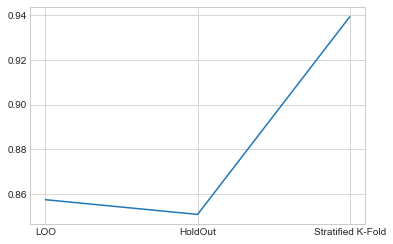

In [18]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','method']
results = list()
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train,Y_train, test_size = size, random_state = 6,stratify=default_data_scenario_groups)
X_train_split = X_train_split.reset_index(drop=True)
X_test_split = X_test_split.reset_index(drop=True)
y_train_split = y_train_split.reset_index(drop=True)
y_test_split = y_test_split.reset_index(drop=True)
holdout = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                          testX_data=X_test_split,testY_data=y_test_split,
                                          scaler=StandardScaler())
loo.append('LOO')
results.append(loo)
holdout.append('HoldOut')
results.append(holdout)
skfold = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                         scaler=StandardScaler(),
                                         cross_validation = selected_fold)
skfold.append('Stratified K-Fold')
results.append(skfold)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['method'],statistics['mae'])
selected_method = statistics.sort_values(by=['mae'])['method'].head(1).values[0]
print("Selected cross validation method: ",selected_method)

### 7th Experiment - Running the MLP function with the different activation functions

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,activation_function
1,0.849280,0.922393,0.960413,0.450390,0.484355,0.806677,1.027674,1.634936,0.175035,2.185982,0.295322,tanh
2,0.850714,0.897043,0.947123,0.418118,0.480502,0.812464,1.002911,1.695551,0.167845,2.290950,0.332187,relu
0,1.140703,1.387204,1.177796,0.294521,0.911646,1.123556,1.301164,1.724574,0.684871,1.725941,-0.012935,logistic


Selected Activation Function:  tanh


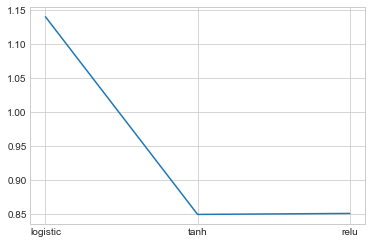

In [19]:
statistical_cols =['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','activation_function']
results = list()
for function in activation_function_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 activation_function=function)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 activation_function= function) 
    else:
        result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 activation_function=function) 
    result.append(function)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['activation_function'],statistics['mae'])
selected_activation_function= statistics.sort_values(by=['mae'])['activation_function'].head(1).values[0]
print("Selected Activation Function: ",selected_activation_function)

### 8th Experiment - Running the MLP function with the different preprocessing methods

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,preprocessing,preprocessingFunc
0,0.850714,0.897043,0.947123,0.418118,0.480502,0.812464,1.002911,1.695551,0.167845,2.290950,0.332187,StandardScaler,"StandardScaler(copy=True, with_mean=True, with..."
1,1.012161,1.144657,1.069886,0.348171,0.726772,0.992860,1.216380,1.550139,0.170896,1.792772,0.173830,MinMaxScaler,"MinMaxScaler(copy=True, feature_range=(0, 1))"
2,1.171702,1.449691,1.204031,0.278332,1.025637,1.133835,1.279236,1.681232,0.640512,1.712355,-0.054653,MaxAbsScaler,MaxAbsScaler(copy=True)
3,1.228468,1.601393,1.265462,0.305050,1.001770,1.253886,1.374362,1.735159,0.717923,1.898837,-0.144145,None,None


Selected Preprocessing:  StandardScaler


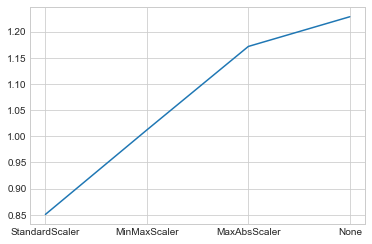

In [20]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','preprocessing','preprocessingFunc']
results = list()
for preprocess in scaler_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=preprocess,
                                                 cross_validation = splited)  
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=preprocess,
                                                 cross_validation = selected_fold)
    else:
        result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=preprocess)
    if(preprocess is None):
        regex = 'None'
    else:
        regex = re.search('(\w+)\(',str(preprocess)).group(1)
    result.append(regex)
    result.append(preprocess)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['preprocessing'],statistics['mae'])
selected_preprocessing = statistics.sort_values(by=['mae'])['preprocessing'].head(1).values[0]
selected_preprocesssing_func = statistics.sort_values(by=['mae'])['preprocessingFunc'].head(1).values[0]
print("Selected Preprocessing: ",selected_preprocessing)

### 9th Experiment - Running the MLP function with the different solvers

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,solvers
2,0.850714,0.897043,0.947123,0.418118,0.480502,0.812464,1.002911,1.695551,0.167845,2.290950,0.332187,adam
1,0.936779,0.995330,0.997662,0.344661,0.693517,0.873500,1.109643,1.420745,0.370693,2.418780,0.255313,sgd
0,3.135829,35.220342,5.934673,5.060214,0.743239,1.518783,2.298785,11.661535,0.046093,32.467786,-29.731771,lbfgs


Selected Solver:  adam


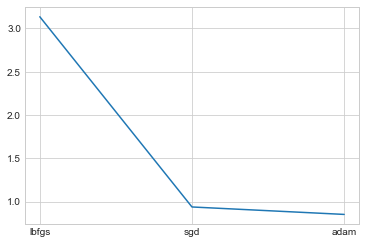

In [21]:
statistical_cols =['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','solvers']
results = list()
for solver in solver_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 solver_function=solver)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 solver_function=solver) 
    else:
        result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 solver_function=solver) 
    result.append(solver)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['solvers'],statistics['mae'])
selected_solver= statistics.sort_values(by=['mae'])['solvers'].head(1).values[0]
print("Selected Solver: ",selected_solver)

### 10th Experiment - Running the MLP function with the different learning rate metrics

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,learning_rates
2,0.933617,0.989229,0.994600,0.344387,0.693209,0.867871,1.100691,1.417964,0.374823,2.413411,0.259440,adaptive
0,0.936779,0.995330,0.997662,0.344661,0.693517,0.873500,1.109643,1.420745,0.370693,2.418780,0.255313,constant
1,1.280264,2.080340,1.442338,0.667135,0.685792,1.358123,1.716021,2.293066,0.032905,2.477690,-0.510018,invscaling


Selected Learning Rate:  adaptive


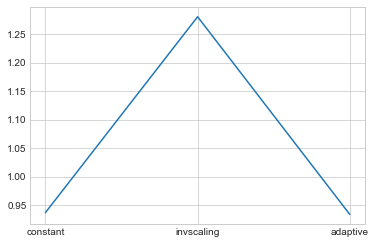

In [22]:
statistical_cols =['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','learning_rates']
results = list()
for rate in learning_rate_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 solver_function='sgd',
                                                 learning_rate_value=rate)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 solver_function='sgd',
                                                 learning_rate_value=rate) 
    else:
        result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 solver_function='sgd',
                                                 learning_rate_value=rate) 
    result.append(rate)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['learning_rates'],statistics['mae'])
selected_learning_rate= statistics.sort_values(by=['mae'])['learning_rates'].head(1).values[0]
print("Selected Learning Rate: ",selected_learning_rate)

### 11th Experiment:  Running the MLP function with the different momentum metrics

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,momentum
1,0.936779,0.995330,0.997662,0.344661,0.693517,0.873500,1.109643,1.420745,0.370693,2.418780,0.255313,0.9
0,1.172032,1.519144,1.232536,0.383065,0.896737,1.170883,1.390491,1.812350,0.430384,2.249227,-0.065888,0.0


Selected Momentum:  0.9


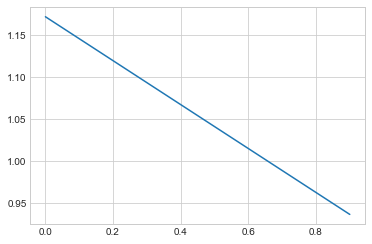

In [23]:
statistical_cols =['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','momentum']
results = list()
for momentum in momentum_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 solver_function='sgd',
                                                 momentum_value=momentum)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 solver_function='sgd',
                                                 momentum_value=momentum) 
    else:
        result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 solver_function='sgd',
                                                 momentum_value=momentum) 
    result.append(momentum)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['momentum'],statistics['mae'])
selected_momentum= statistics.sort_values(by=['mae'])['momentum'].head(1).values[0]
print("Selected Momentum: ",selected_momentum)

### 12th Experiment:  Running the MLP function with the different alpha values metrics

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,alpha_value
0,0.850714,0.897043,0.947123,0.418118,0.480502,0.812464,1.002911,1.695551,0.167845,2.290950,0.332187,0.00010
1,0.850864,0.897159,0.947185,0.417950,0.482330,0.812627,1.002523,1.695193,0.168135,2.290774,0.332095,0.00100
2,0.851187,0.897632,0.947435,0.417859,0.478679,0.813572,1.002811,1.695817,0.166384,2.291891,0.331801,0.00001
3,0.873620,0.922570,0.960505,0.400915,0.564178,0.828494,1.013898,1.693786,0.166579,2.282667,0.318198,0.10000


Selected Alpha:  0.0001


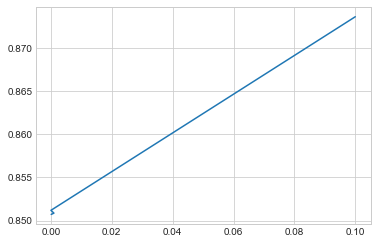

In [24]:
statistical_cols =['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','alpha_value']
results = list()
for alpha in alpha_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 alpha_value = alpha)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 alpha_value = alpha) 
    else:
        result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 alpha_value = alpha) 
    result.append(alpha)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['alpha_value'],statistics['mae'])
selected_alpha= statistics.sort_values(by=['mae'])['alpha_value'].head(1).values[0]
print("Selected Alpha: ",selected_alpha)

### 13th Experiment:  Running the MLP function with the different iteration metrics

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,max_iter
4,0.841643,0.889517,0.943142,0.427452,0.502031,0.798204,0.988344,1.737688,0.160445,2.305892,0.335530,2000
3,0.850714,0.897043,0.947123,0.418118,0.480502,0.812464,1.002911,1.695551,0.167845,2.290950,0.332187,1000
2,1.099854,1.334243,1.155095,0.354455,0.991173,1.116499,1.203244,1.665274,0.070780,2.315419,0.063831,500
1,1.146745,1.454317,1.205951,0.374824,0.935664,1.177031,1.297993,1.707977,0.184020,2.265800,-0.017279,400
0,1.291631,1.998388,1.413644,0.576995,0.944041,1.334876,1.544634,2.228155,0.129342,2.545129,-0.440262,200


Selected Maximum iterations:  2000


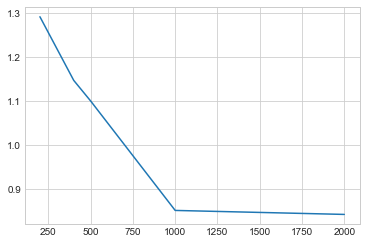

In [25]:
statistical_cols =['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','max_iter']
results = list()
for iteration in number_iterations_list:
    if selected_method == 'LOO':
        cv = LeaveOneGroupOut()
        splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = splited,
                                                 max_iterations=iteration)                                           
    elif selected_method =='Stratified K-Fold':
        result = compute_MLP_with_Regression(testX_data=X_train,testY_data=Y_train,
                                                 scaler=StandardScaler(),
                                                 cross_validation = selected_fold,
                                                 max_iterations=iteration) 
    else:
        result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=StandardScaler(),
                                                 max_iterations=iteration) 
    result.append(iteration)
    results.append(result)
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
plt.plot(statistics['max_iter'],statistics['mae'])
selected_max_iterartions= statistics.sort_values(by=['mae'])['max_iter'].head(1).values[0]
print("Selected Maximum iterations: ",selected_max_iterartions)

### 14th Experiment: Running the KNN function with data filtered 

In [26]:
def apply_filter():
    statistical_cols =  ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared','filter']
    results = list()
    for filterelement in filters_list:
        if filterelement == 'Median':
            result = apply_median_filter()
        elif filterelement == 'Mean':
            result = apply_mean_filter()
        else:
            result = compute_MLP_with_Regression(trainX_data=X_train,trainY_data=Y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 cross_validation = selected_fold,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
            result.append('No Filter')
        results.append(result)
    statistics = pd.DataFrame(columns=statistical_cols,data=results)
    display(statistics.sort_values(by=['mae']))
    plt.plot(statistics['filter'],statistics['mae'])
    selected_filter = statistics.sort_values(by=['mae'])['filter'].head(1).values[0]
    print("Selected Filter: ",selected_filter)
    return selected_filter
            

def apply_median_filter():
    medians = list()
    aps = ['coordinate_X','coordinate_Y']
    for col in X_train.columns: 
         aps.append(col)
    for rp, access_points in reference_points:
        x = rp[0]
        y = rp[1]
        medians_list = [x,y]
        for ap in X_train:
            median = access_points[ap].median()
            medians_list.append(median)
        medians.append(medians_list)
    median_pd = pd.DataFrame(medians,columns = aps)
    x_train = median_pd.iloc[:,2:]
    y_train = median_pd.iloc[:,:2]
    nan_filler = x_train.min().min()*1.010
    x_train = x_train.replace(0, np.nan)
    x_train = x_train.fillna(nan_filler)
    result = compute_MLP_with_Regression(trainX_data=x_train,trainY_data=y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
    result.append('Median')
    return result

def apply_mean_filter(): 
    means = list()
    aps = ['coordinate_X','coordinate_Y']
    for col in X_train.columns: 
         aps.append(col)
    for rp, access_points in reference_points:
        x = rp[0]
        y = rp[1]
        means_list = [x,y]
        for ap in X_train:
            mean = access_points[ap].mean()
            means_list.append(mean)
        means.append(means_list)
    mean_pd = pd.DataFrame(means,columns = aps)
    x_train = mean_pd.iloc[:,2:]
    y_train = mean_pd.iloc[:,:2]
    nan_filler = X_train.min().min()*1.010
    x_train = x_train.replace(0, np.nan)
    x_train = x_train.fillna(nan_filler)
    result = compute_MLP_with_Regression(trainX_data=x_train,trainY_data=y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
    result.append('Mean')
    return result

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared,filter
1,0.758256,0.721563,0.849449,0.384379,0.451685,0.716723,0.917438,1.353163,0.123181,2.352175,0.458480,Mean
2,0.980936,1.178740,1.085698,0.467100,0.661935,1.019326,1.209409,1.608939,0.142436,2.422391,0.087209,No Filter
0,1.245564,1.956679,1.398814,0.639055,0.730117,1.273588,1.697760,2.268074,0.116179,2.567664,-0.462966,Median


Selected Filter:  Mean


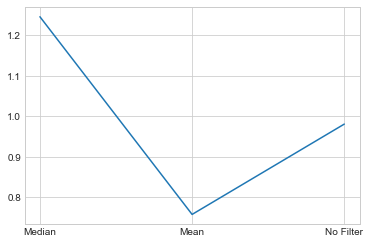

In [27]:
selected_filter = apply_filter()

# Results Analysis and Conclusion
Analysis of the outcomes of the different experiments and final conclusions.

In [28]:
conclusion_cols=['Activation Function','Cross Validation','Solver','Preprocessing','Alpha','Learning Rate','Momentum','Iterations','Filtering']
conclusion_list = [selected_activation_function,selected_method,selected_solver,selected_preprocessing,selected_alpha,
                   selected_learning_rate,selected_momentum,selected_max_iterartions,selected_filter]
conclusion_pd = pd.DataFrame([conclusion_list],columns= conclusion_cols)
display(conclusion_pd)
statistical_cols_csv = conclusion_cols
statistical_cols_csv.append('Experimentation')
result_csv = conclusion_list
result_csv.append('MLP Regressor Bluetooth')
results_csv = [result_csv]
results_df = pd.DataFrame(columns=statistical_cols_csv,data=results_csv)
results_df.to_csv('../parameters_neural_networks_results.csv',mode='a',index=False,header=False)

,Activation Function,Cross Validation,Solver,Preprocessing,Alpha,Learning Rate,Momentum,Iterations,Filtering
0,tanh,HoldOut,adam,StandardScaler,0.0001,adaptive,0.9,2000,Mean


### Best Result

In [29]:
statistical_cols = ['mae','mse','rmse','std','.25','0.5','0.75','0.95','min','max','r-squared']
if selected_method == 'LOO':
    cv = LeaveOneGroupOut()
    splited = cv.split(X_train,Y_train,groups=default_data_scenario_groups)
    result = compute_MLP_with_Regression(trainX_data=X_train,trainY_data=Y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 cross_validation = splited,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
elif selected_method =='Stratified K-Fold':
    result = compute_MLP_with_Regression(trainX_data=X_train,trainY_data=Y_train,
                                                 testX_data=X_train,testY_data=Y_train,
                                                 scaler=selected_preprocesssing_func,
                                                 cross_validation = selected_fold,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions) 
else:
    result = compute_MLP_with_Regression(trainX_data=X_train_split,trainY_data=y_train_split,
                                                 testX_data=X_test_split,testY_data=y_test_split,
                                                 scaler=selected_preprocesssing_func,
                                                 activation_function=selected_activation_function,
                                                 solver_function=selected_solver,
                                                 learning_rate_value=selected_learning_rate,
                                                 momentum_value=selected_momentum,
                                                 alpha_value=selected_alpha,
                                                 max_iterations=selected_max_iterartions)
results = [result]
statistics = pd.DataFrame(columns=statistical_cols,data=results)
display(statistics.sort_values(by=['mae']))
statistical_cols_csv = ['mae','mse','rmse']
statistical_cols_csv.append('Experimentation')
result_csv = result[0:3]
result_csv.append('MLP Regressor Bluetooth')
results_csv = [result_csv]
results_df = pd.DataFrame(columns=statistical_cols_csv,data=results_csv)
results_df.to_csv('../tests_results.csv',mode='a',index=False,header=False)

,mae,mse,rmse,std,.25,0.5,0.75,0.95,min,max,r-squared
0,0.84928,0.922393,0.960413,0.45039,0.484355,0.806677,1.027674,1.634936,0.175035,2.185982,0.295322
